In [1]:
!unzip /content/RGAN.zip -d ''
%cd RGAN

Archive:  /content/RGAN.zip
   creating: RGAN/__pycache__/
  inflating: RGAN/__pycache__/data_loading.cpython-36.pyc  
  inflating: RGAN/__pycache__/data_loading.cpython-37.pyc  
  inflating: RGAN/__pycache__/rgan.cpython-36.pyc  
  inflating: RGAN/__pycache__/rgan.cpython-37.pyc  
  inflating: RGAN/__pycache__/utils.cpython-36.pyc  
  inflating: RGAN/__pycache__/utils.cpython-37.pyc  
   creating: RGAN/data/
  inflating: RGAN/data/calaveras_telemetry_multi.csv  
  inflating: RGAN/data/stock.csv     
  inflating: RGAN/data_loading.py    
  inflating: RGAN/main.py            
   creating: RGAN/metrics/
   creating: RGAN/metrics/__pycache__/
  inflating: RGAN/metrics/__pycache__/discriminative_metrics.cpython-36.pyc  
  inflating: RGAN/metrics/__pycache__/discriminative_metrics.cpython-37.pyc  
  inflating: RGAN/metrics/__pycache__/predictive_metrics.cpython-37.pyc  
  inflating: RGAN/metrics/__pycache__/visualization_metrics.cpython-36.pyc  
  inflating: RGAN/metrics/__pycache__/visuali

In [2]:
!python main.py

Streaming output truncated to the last 5000 lines.
[Step 5001; L(G): 1.4101815223693848; L(D): 0.749143123626709]
[Step 5002; L(G): 1.3576909303665161; L(D): 0.7315232753753662]
[Step 5003; L(G): 1.3369537591934204; L(D): 0.7416106462478638]
[Step 5004; L(G): 1.3527486324310303; L(D): 0.7329105138778687]
[Step 5005; L(G): 1.300763487815857; L(D): 0.795856237411499]
[Step 5006; L(G): 1.3673629760742188; L(D): 0.7012924551963806]
[Step 5007; L(G): 1.3102790117263794; L(D): 0.8080872893333435]
[Step 5008; L(G): 1.2663276195526123; L(D): 0.7839009165763855]
[Step 5009; L(G): 1.2985310554504395; L(D): 0.7558776140213013]
[Step 5010; L(G): 1.3366879224777222; L(D): 0.8466982841491699]
[Step 5011; L(G): 1.3057594299316406; L(D): 0.7495043873786926]
[Step 5012; L(G): 1.2494257688522339; L(D): 0.7376580834388733]
[Step 5013; L(G): 1.2632553577423096; L(D): 0.7973838448524475]
[Step 5014; L(G): 1.2920857667922974; L(D): 0.7433677911758423]
[Step 5015; L(G): 1.321263313293457; L(D): 0.82766938209

## Looking at the Synthetic Data

In [3]:
import numpy as np 

with open('data/synthetic_data.npy', 'rb') as f:
    generated_data = np.load(f)

with open('data/real_data.npy', 'rb') as f:
    ori_data = np.load(f)

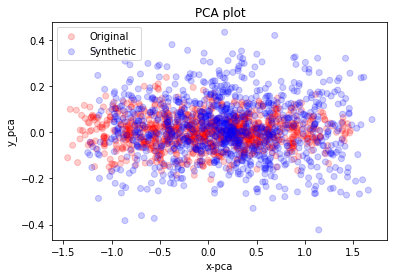

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.089137
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.215309
[t-SNE] KL divergence after 300 iterations: 1.191485


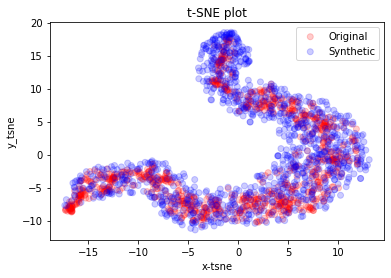

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

   
def visualization (ori_data, generated_data, analysis):
  """Using PCA or tSNE for generated and original data visualization.
  
  Args:
    - ori_data: original data
    - generated_data: generated synthetic data
    - analysis: tsne or pca
  """  
  # Analysis sample size (for faster computation)
  anal_sample_no = min([1000, len(ori_data)])
  idx = np.random.permutation(len(ori_data))[:anal_sample_no]
    
  # Data preprocessing
  ori_data = np.asarray(ori_data)
  generated_data = np.asarray(generated_data)  
  
  ori_data = ori_data[idx]
  generated_data = generated_data[idx]
  
  no, seq_len, dim = ori_data.shape  
  
  for i in range(anal_sample_no):
    if (i == 0):
      prep_data = np.reshape(np.mean(ori_data[0,:,:], 1), [1,seq_len])
      prep_data_hat = np.reshape(np.mean(generated_data[0,:,:],1), [1,seq_len])
    else:
      prep_data = np.concatenate((prep_data, 
                                  np.reshape(np.mean(ori_data[i,:,:],1), [1,seq_len])))
      prep_data_hat = np.concatenate((prep_data_hat, 
                                      np.reshape(np.mean(generated_data[i,:,:],1), [1,seq_len])))
    
  # Visualization parameter        
  colors = ["red" for i in range(anal_sample_no)] + ["blue" for i in range(anal_sample_no)]    
    
  if analysis == 'pca':
    # PCA Analysis
    pca = PCA(n_components = 2)
    pca.fit(prep_data)
    pca_results = pca.transform(prep_data)
    pca_hat_results = pca.transform(prep_data_hat)
    
    # Plotting
    f, ax = plt.subplots(1)    
    plt.scatter(pca_results[:,0], pca_results[:,1],
                c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
    plt.scatter(pca_hat_results[:,0], pca_hat_results[:,1], 
                c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")
  
    ax.legend()  
    plt.title('PCA plot')
    plt.xlabel('x-pca')
    plt.ylabel('y_pca')
    plt.show()
    
  elif analysis == 'tsne':
    
    # Do t-SNE Analysis together       
    prep_data_final = np.concatenate((prep_data, prep_data_hat), axis = 0)
    
    # TSNE anlaysis
    tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
    tsne_results = tsne.fit_transform(prep_data_final)
      
    # Plotting
    f, ax = plt.subplots(1)
      
    plt.scatter(tsne_results[:anal_sample_no,0], tsne_results[:anal_sample_no,1], 
                c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
    plt.scatter(tsne_results[anal_sample_no:,0], tsne_results[anal_sample_no:,1], 
                c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")
  
    ax.legend()
      
    plt.title('t-SNE plot')
    plt.xlabel('x-tsne')
    plt.ylabel('y_tsne')
    plt.show()  

visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')